# Описание проекта

* <b> Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

* Необходими выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

* <b> Описание данных</b>
** Name — название игры
** Platform — платформа
** Year_of_Release — год выпуска
** Genre — жанр игры
** NA_sales — продажи в Северной Америке (миллионы проданных копий)
** EU_sales — продажи в Европе (миллионы проданных копий)
** _sales — продажи в Японии (миллионы проданных копий)
** Other_sales — продажи в других странах (миллионы проданных копий)
** Critic_Score — оценка критиков (максимум 100)
** User_Score — оценка пользователей (максимум 10)
** Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

* <b> План работы </b>
** Определить пропуски и ошибки в данных
** Провести исследовательский анализ данных
** Составить портрет пользователя каждого региона 
** Проверьте гипотезы

#### Импорт библиотек и открытие csv файла с данными.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os

pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Подготовка данных

In [3]:
data.info()
data.columns
data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице есть пропуски и одно несоответствие с типом данных. 
Есть пару пропусков в названии игр для общего анализа это не критично.
Строчки с пропусками по году игр можно пропустить т.к. их количество незначительно.
Пропуски в оценки критиков и пользователей возможны по причине что люди не могли оценить все игры.
Заполение пропусков в данной таблице может привести к сильному искажению данных.
Тип столбца User_Score нужно поменять на числовой вещественный.
Также необходимо привести названия колонок к нижнему регистру.

In [4]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales',
                'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [5]:
data[data['name'].duplicated()]
data[data[['name','platform']].duplicated()]


data[data['name'] == 'Need for Speed: Most Wanted']
data[data['name'] == 'Madden NFL 13']
data[data['platform'] == 'GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [6]:
data.drop(labels = [16230],axis=0, inplace = True)
data.drop(labels = [14244],axis=0, inplace = True)

В именах игр возможны повторы т.к. одни и теже игры выпускаются на разных платформах. 
При поиске дубликатов в паре name platform было найдено 4 дубликата. Игра Need for Speed: Most Wanted выпускалась на разных платформах в 2005 и 2012 году. Действительно это было переиздание одного и того же продукта в который добавили многопользовательский режим. Поэтому нельзя считать это дубликатами.

Помимо этого нашлись пара дубликатов которые были убраны из данных.

In [7]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
data['user_score'].unique()
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура 'tbd' означает To Be Determined или To Be Discussed по сути это отсутсвие рейтинга. возможно это связанно с тем что игра новая и еще не получила оценку пользователей.

In [9]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [10]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

#### Анализ представленных данных

<AxesSubplot:xlabel='year_of_release'>

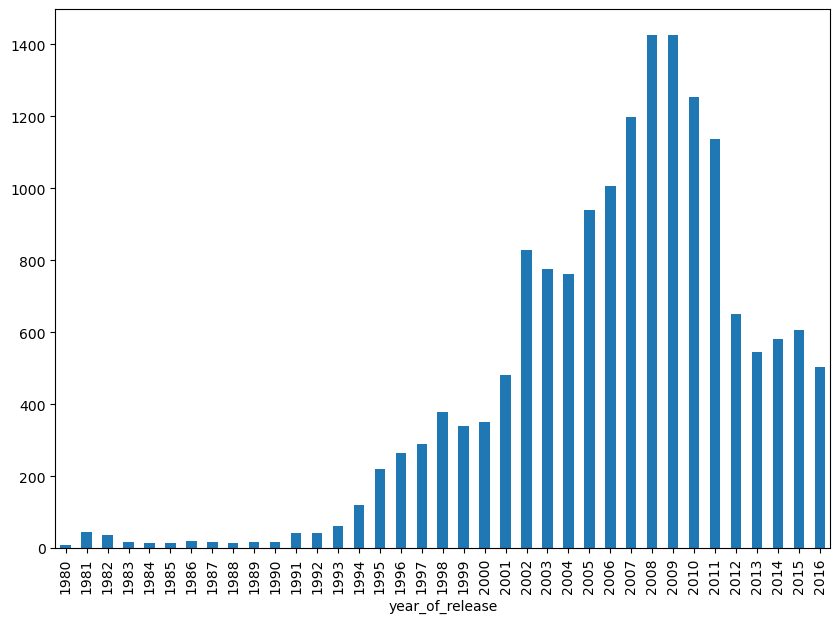

In [35]:
data.groupby(by='year_of_release')['all_sales'].count().plot(kind='bar', figsize=(10,7))

<AxesSubplot:xlabel='year_of_release'>

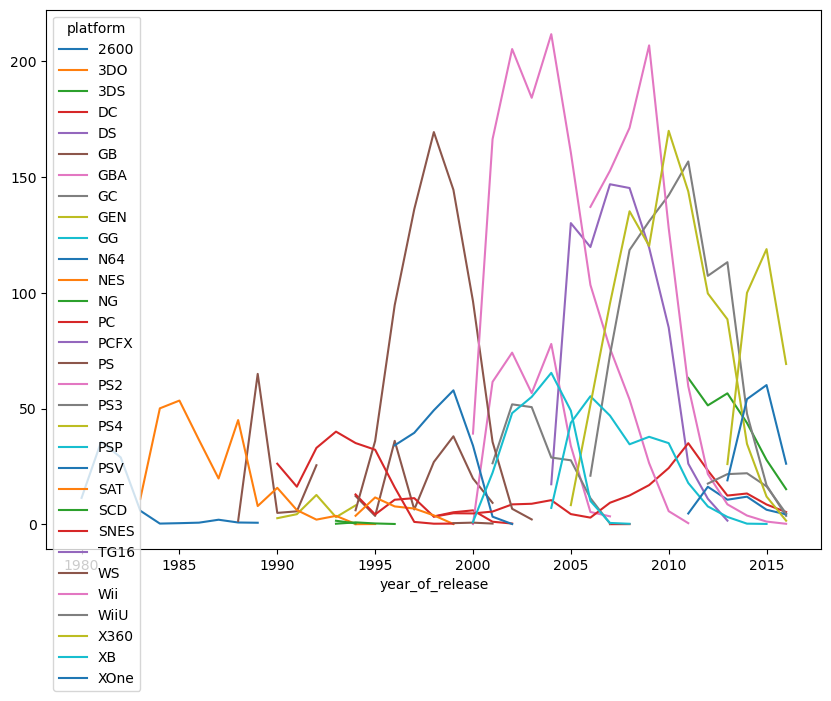

In [36]:
data.groupby(['platform', 'year_of_release'])['all_sales'].sum().unstack('platform').plot(figsize=(10,7))

До 1995 года выпускалось несоизмеримо мало игр. Эти данные можно не рассматривать для анализа.

In [13]:
data_cut = data[data['year_of_release'] > 1994]

<AxesSubplot:xlabel='year_of_release'>

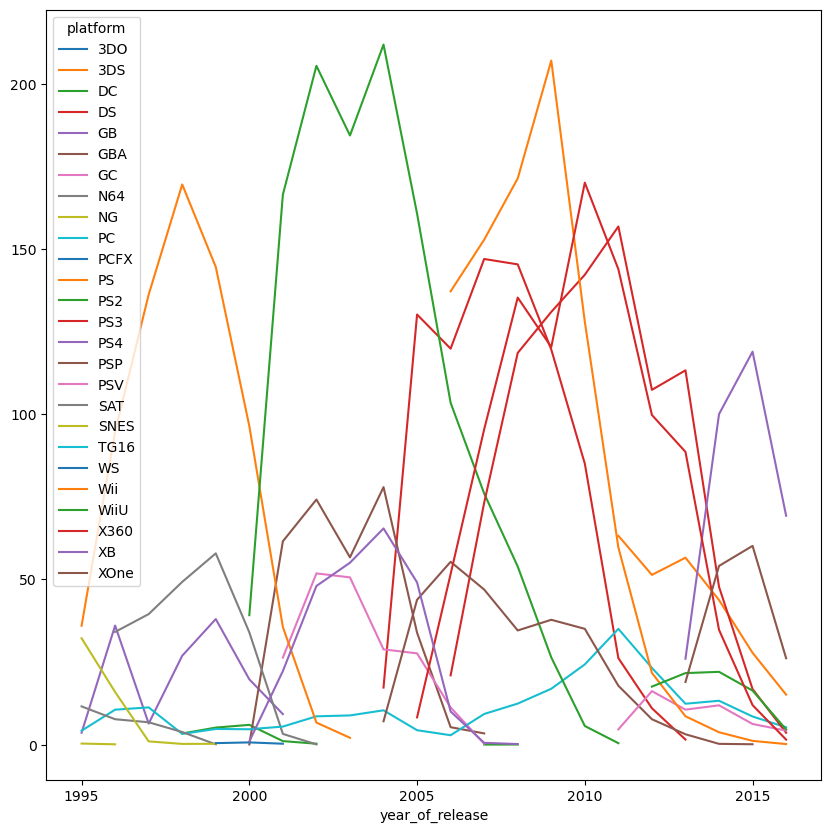

In [14]:
data_cut.groupby(['platform', 'year_of_release'])['all_sales'].sum().unstack('platform').plot(figsize=(10,7))

На графике отчетливо видно что платформы не потерявшие свою актуальность существуют в среднем с 2012 - 2013 года. 
Для анализа на 2017 год период с 2013 года будет актуальным и обоснованным. Полагаться на временные отрезки жизни платформ в период с 1995 по 2013 нет смысла т.к. динамика развития индустрии быстро менятся и старые данные совершенно не актуальны.

In [15]:
data_cut = data[data['year_of_release'] > 2013]

platform
PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: all_sales, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

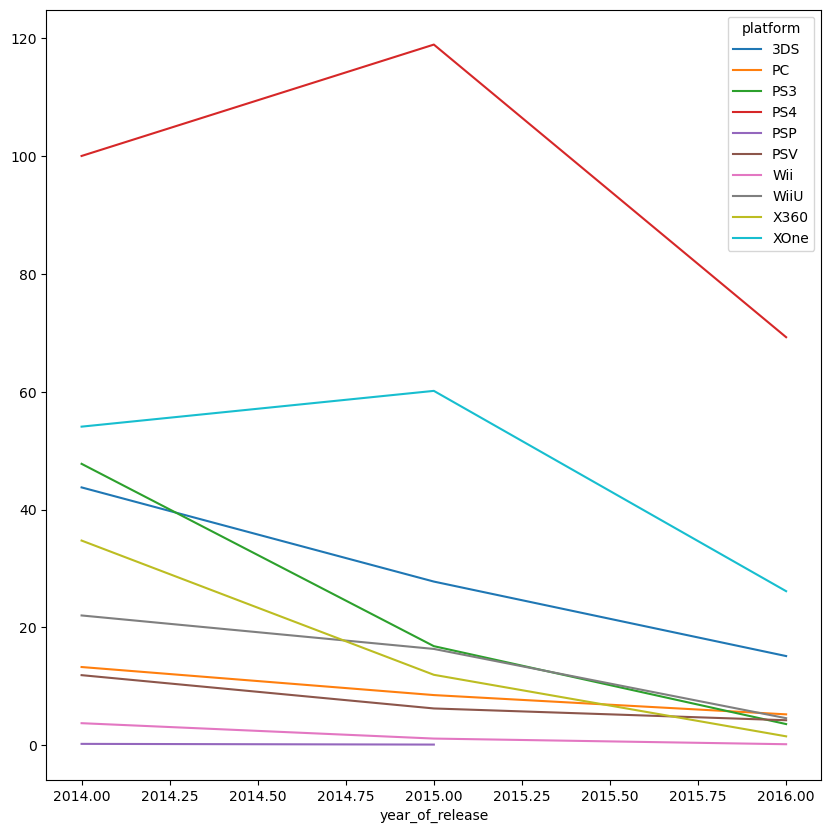

In [16]:
data_cut.groupby(['platform'])['all_sales'].count().sort_values(ascending=False)
data_cut.groupby(['platform', 'year_of_release'])['all_sales'].sum().unstack('platform').plot(figsize=(10,7))

Из популярных консолей можно отметить рост продаж у PS4, PC и Xbox One. Портативные аналоги ps и хbox упали в продажах, возможно это связано с ростом игровой индустрии для мобильных телефонов.

<Figure size 2000x800 with 0 Axes>

<AxesSubplot:xlabel='all_sales', ylabel='platform'>

(0.0, 1.0)

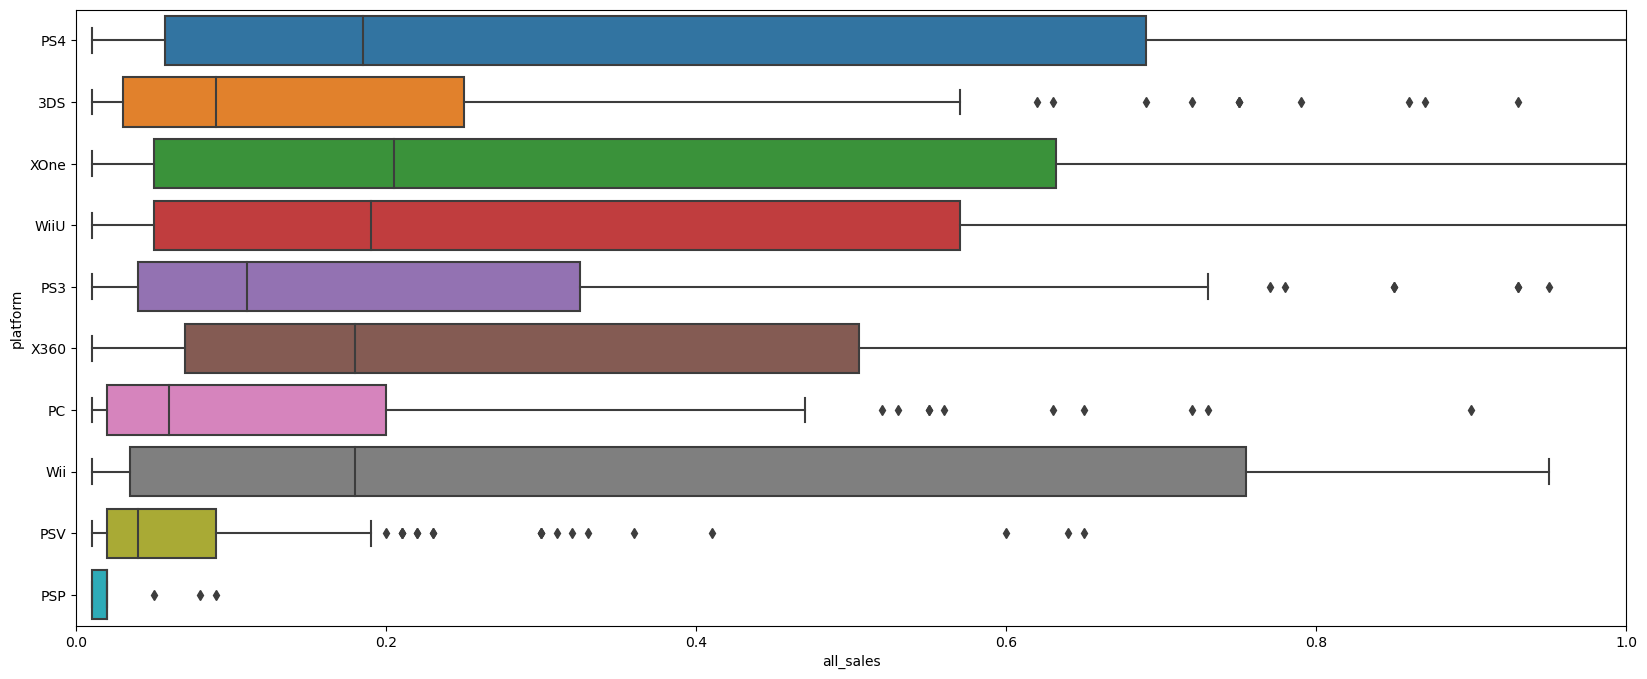

In [17]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data_cut, x='all_sales', y='platform');
plt.xlim(0,1)

Если судить прибыльности за игру на платформе по медианам то все они в среднем на отметки 0.2 млн долларов.
Самые прибыльные платформы для разработчиков игр оказалить Wii, PS4 и Xbox one.

<AxesSubplot:xlabel='platform'>

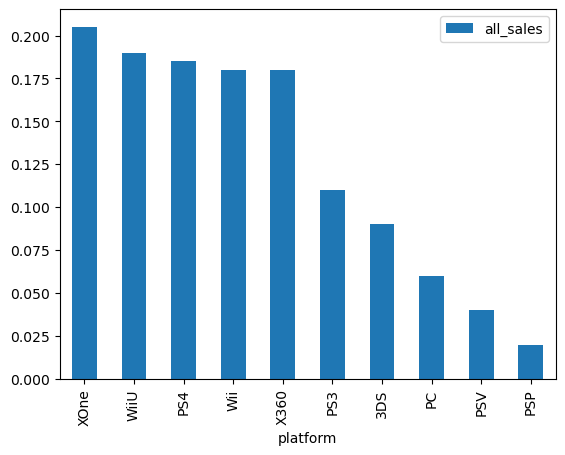

In [18]:
data_cut.groupby('platform').median().reset_index().sort_values(by='all_sales',ascending=False).plot(x='platform', y='all_sales', kind='bar')

<AxesSubplot:title={'center':'Зависимость продаж от оценки КРИТИКОВ на платформе PS4'}, xlabel='critic_score', ylabel='all_sales'>

<AxesSubplot:title={'center':'Зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на платформе PS4'}, xlabel='user_score', ylabel='all_sales'>

,critic_score,user_score,all_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
all_sales,0.402661,-0.040132,1.000000


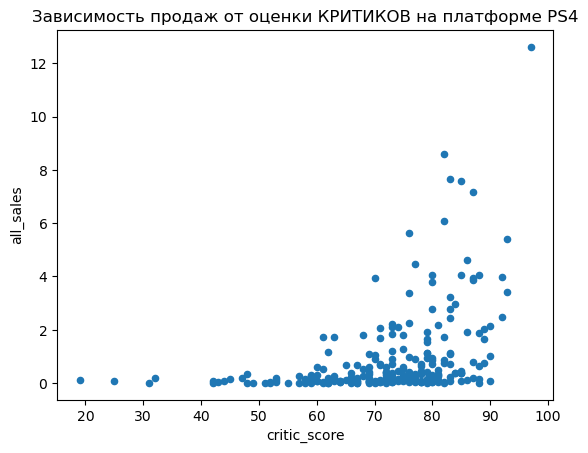

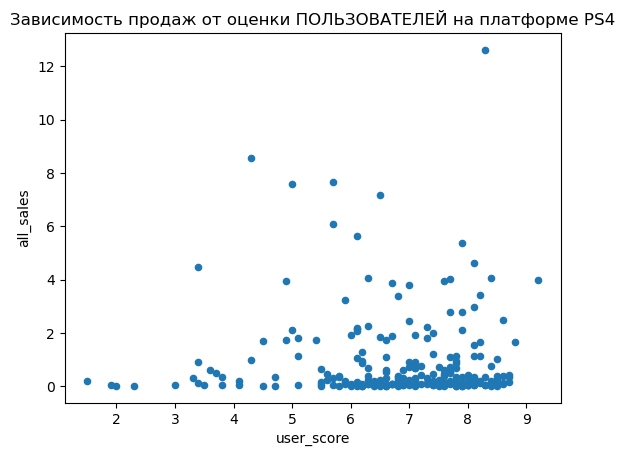

In [19]:
data_cut[data_cut['platform'] == 'PS4' ].plot(x='critic_score', y='all_sales', kind='scatter', title='Зависимость продаж от оценки КРИТИКОВ на платформе PS4') 
data_cut[data_cut['platform'] == 'PS4'].plot(x='user_score', y='all_sales', kind='scatter',title='Зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на платформе PS4') 
data_cut[data_cut['platform'] == 'PS4' ][['critic_score','user_score', 'all_sales']].corr()


In [38]:
data_cut[data_cut['platform'] == 'XOne' ].plot(x='critic_score', y='all_sales', kind='scatter', title='Зависимость продаж от оценки КРИТИКОВ на платформе XOne') 
data_cut[data_cut['platform'] == 'XOne'].plot(x='user_score', y='all_sales', kind='scatter',title='Зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на платформе XOne') 
data_cut[data_cut['platform'] == 'XOne' ][['critic_score','user_score', 'all_sales']].corr()


SyntaxError: positional argument follows keyword argument (1422900322.py, line 1)

<AxesSubplot:title={'center':'Зависимость продаж от оценки КРИТИКОВ на платформе WiiU'}, xlabel='critic_score', ylabel='all_sales'>

<AxesSubplot:title={'center':'Зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на платформе WiiU'}, xlabel='user_score', ylabel='all_sales'>

,critic_score,user_score,all_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
all_sales,0.370201,0.407926,1.000000


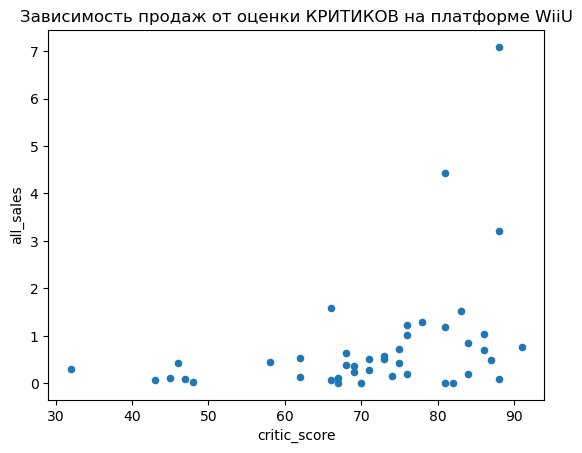

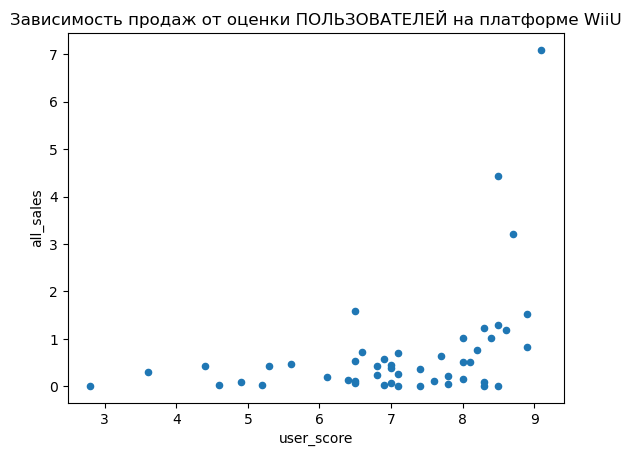

In [21]:
data_cut[data_cut['platform'] == 'WiiU' ].plot(x='critic_score', y='all_sales', kind='scatter', title='Зависимость продаж от оценки КРИТИКОВ на платформе WiiU') 
data_cut[data_cut['platform'] == 'WiiU'].plot(x='user_score', y='all_sales', kind='scatter',title='Зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на платформе WiiU') 
data_cut[data_cut['platform'] == 'WiiU' ][['critic_score','user_score', 'all_sales']].corr()


Зависимось продаж от оценки критиков существует но она недостаточно сильная. На выбранных платформах эта зависимость приблезительно одинаковая.

Зависимость продаж от оценки пользователей сильно отличается на разных платформах. Но в целом можно сказать что мнение пользователей не всегда влияет на продажи.
Возможно это связанно с тем что хороший рейтинг критиков стимулирует продажи, а пользовательский рейтинг составлен уже после продаж.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    <s>
Перед построением подобного графика необходимо добавить фильтрацию пропусков. Также нужно рассчитать коэфициенты корреляции между отзывами и продажами по платформам. По условию необходимо соотнести результаты с анализом по другим платформам (рассмотреть 2-4 платформы, также рассчитав корреляцию по ним). Выводы, сделанные на основе расчетов по нескольким платформам выглядят "весомей" и убедительней.

<div class="alert alert-info"> <b>Комментарий студента:</b> Проанализировал корреляции по нескольким платформам и переписал вывод т.к. проявились различия в платформах.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Теперь все отлично)

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за подсказку по библиотеке</div>

<AxesSubplot:xlabel='genre'>

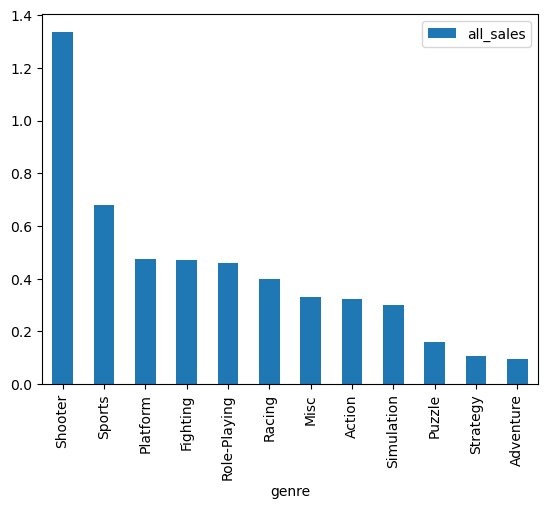

In [22]:
data_cut.groupby('genre').mean().reset_index().sort_values(by='all_sales',ascending=False).plot(x='genre', y='all_sales', kind='bar')

Самое большая выручка по жанрам у Shooter. Этот жанр лидирует с большим отрывом.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
<s>
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔 v_2 <a class="tocSkip"></h2>
<s>
Давай добавим вывод по жанрам

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил вывод</div>

#### Составим портрет пользователя из каждого региона

In [23]:
#data_cut.groupby('eu_sales').sum().reset_index().sort_values(by='all_sales',ascending=False)

<AxesSubplot:title={'center':'Europe'}, xlabel='platform'>

<AxesSubplot:title={'center':'North America'}, xlabel='platform'>

<AxesSubplot:title={'center':'Japan'}, xlabel='platform'>

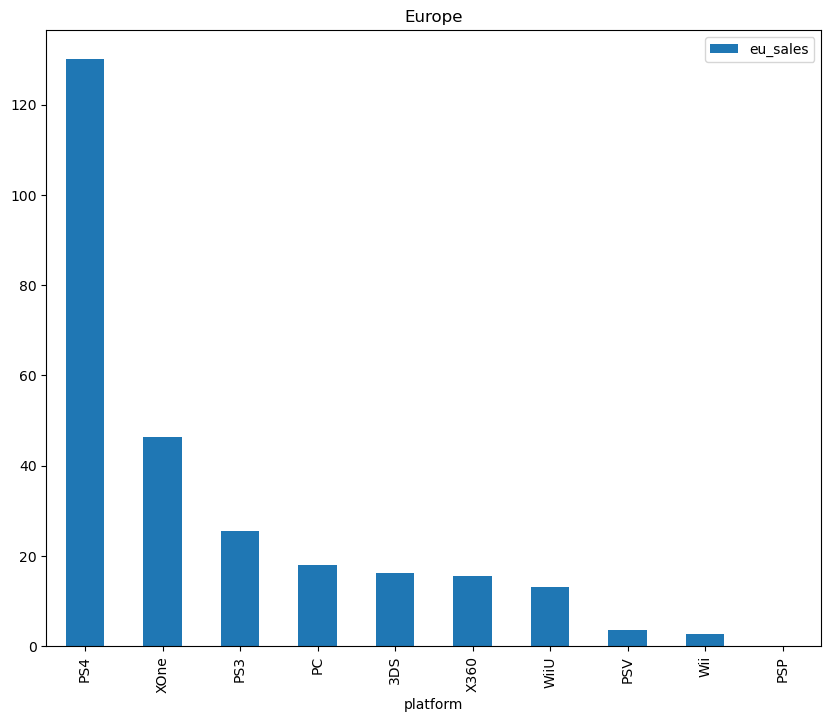

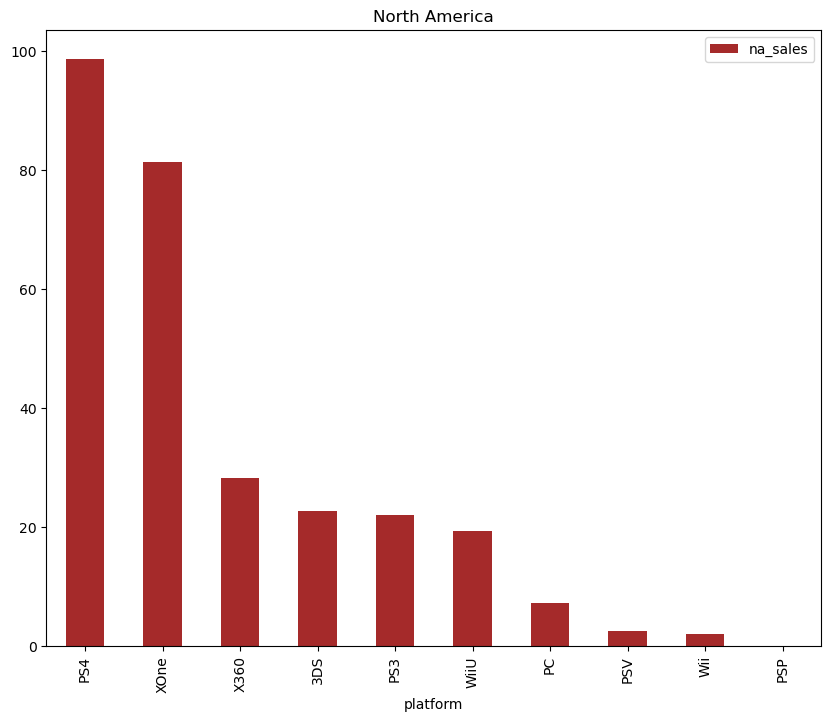

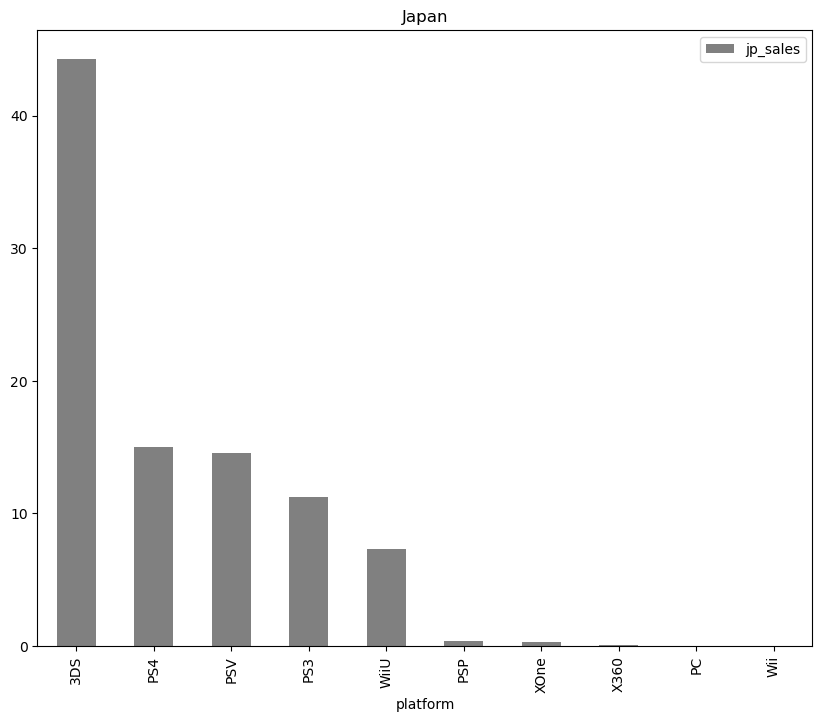

In [24]:
data_cut.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).plot(figsize=(10, 8), kind='bar', title='Europe')
data_cut.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='brown',  title='North America')
data_cut.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='gray', title='Japan')

В зависимости от региона выбор пользователей сильно разнится. В Европе популярностью пользуется  платформы PlayStation.
В Северной Америке Xbox. В Японии это Nintendo.

Также можно отметить что в Японии большой популярностью пользуются портативные платформы. Это основное отличие Японского рынка.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Все верно, отличная работа. Следует ограничить кол-во платформ на графике топ-5, согласно условию.

<AxesSubplot:title={'center':'Europe'}, xlabel='genre'>

<AxesSubplot:title={'center':'North America'}, xlabel='genre'>

<AxesSubplot:title={'center':'Japan'}, xlabel='genre'>

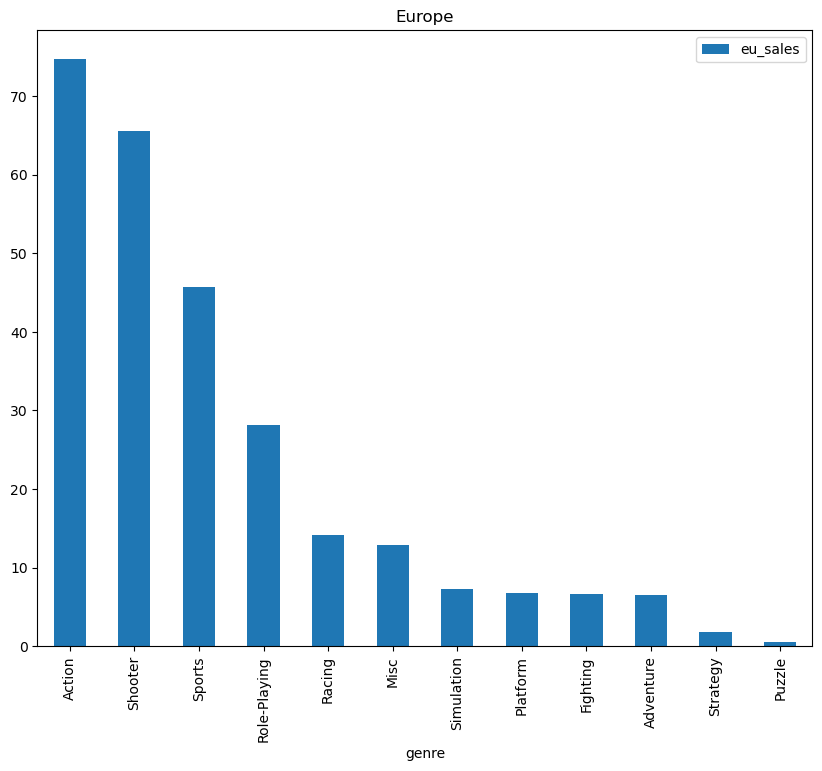

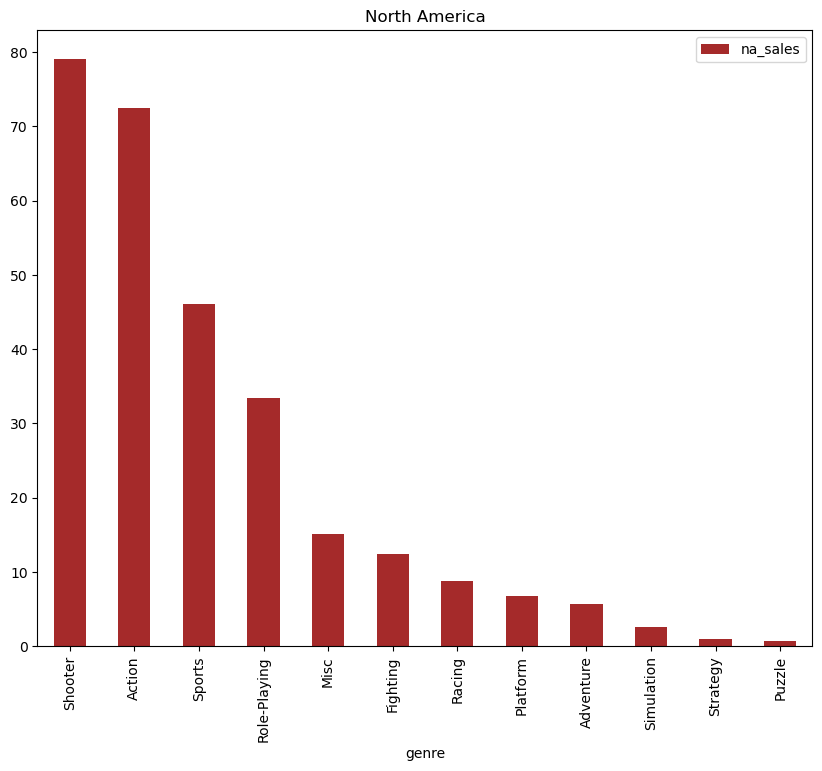

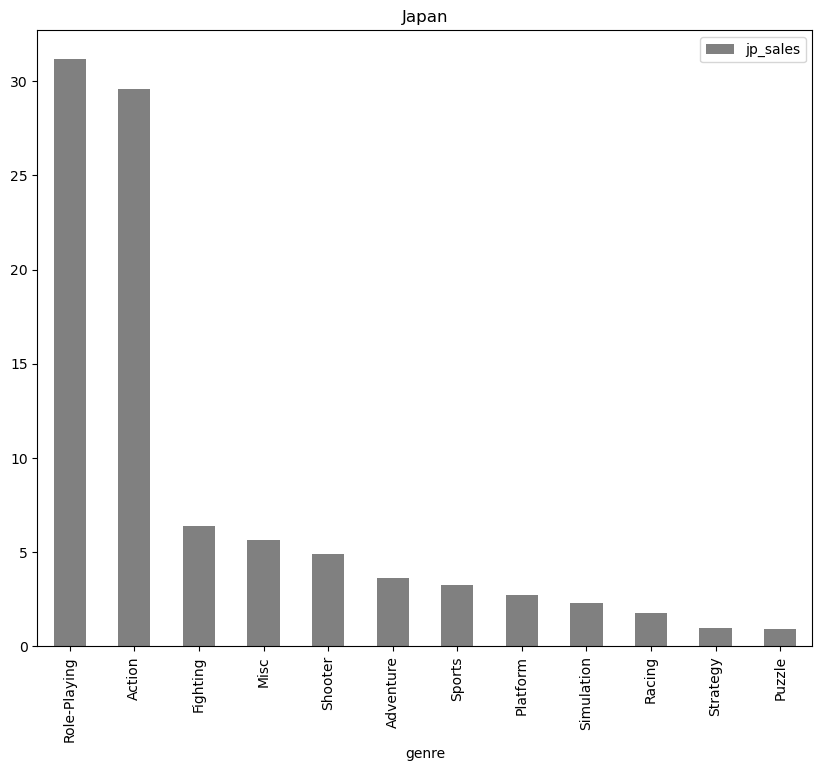

In [25]:
data_cut.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).plot(figsize=(10, 8), kind='bar', title='Europe')
data_cut.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='brown',  title='North America')
data_cut.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='gray', title='Japan')
#data_cut.groupby('genre').agg({'other_sales': 'sum'}).sort_values(by='other_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='darkgreen', title='Other regions')

В Европпе и Северной Америке предпочтения по жанрам схожи. Выбор пользователей в Японии также кооридинально отличается в пользу RPG игр.
Во всех регионах жанр Action является самым популярным.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Разве в Америке самый  популярный жанр Action? По графику это шутеры)

In [26]:
data_cut['rating'].replace(np.NaN, 'без рейтинга', inplace=True)

C:\Users\Антон\AppData\Local\Temp\ipykernel_4324\2856366305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cut['rating'].replace(np.NaN, 'без рейтинга', inplace=True)


<AxesSubplot:xlabel='rating'>

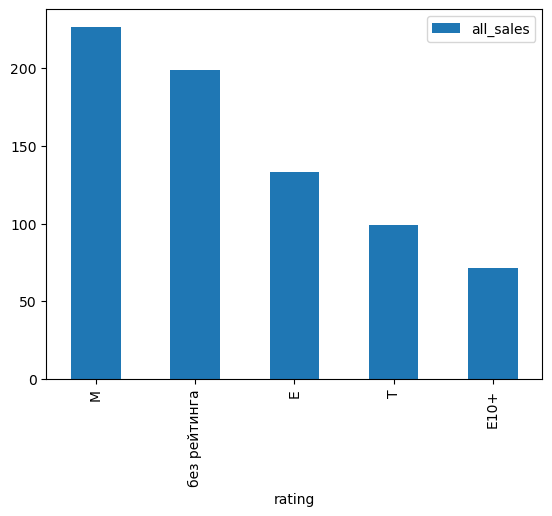

In [27]:
data_cut.groupby('rating').sum().reset_index().sort_values(by='all_sales', ascending=False).plot(kind='bar', x='rating', y='all_sales')

<AxesSubplot:title={'center':'Europe'}, xlabel='rating'>

<AxesSubplot:title={'center':'North America'}, xlabel='rating'>

<AxesSubplot:title={'center':'Japan'}, xlabel='rating'>

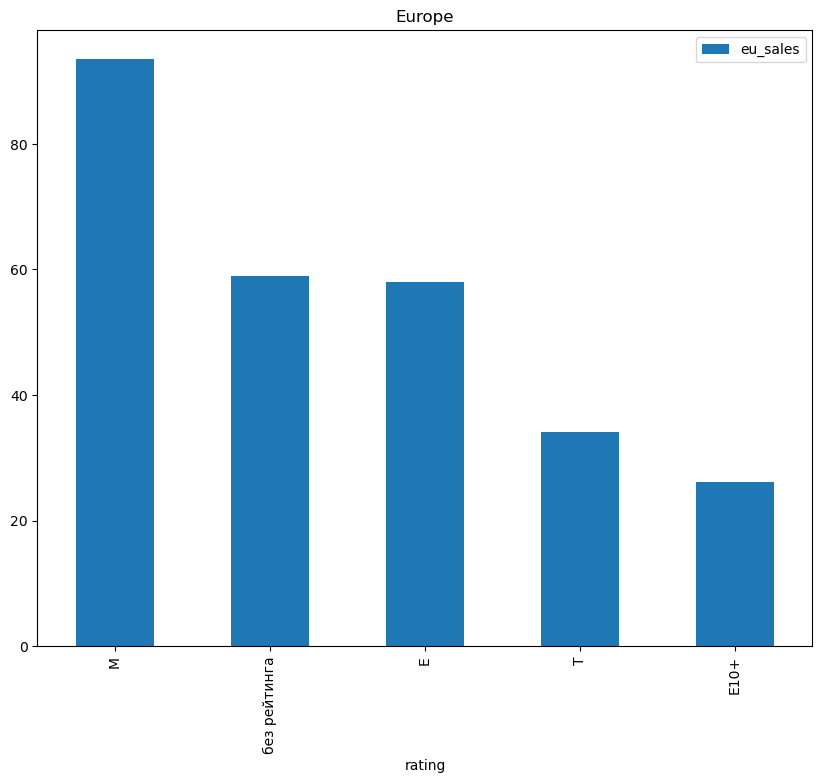

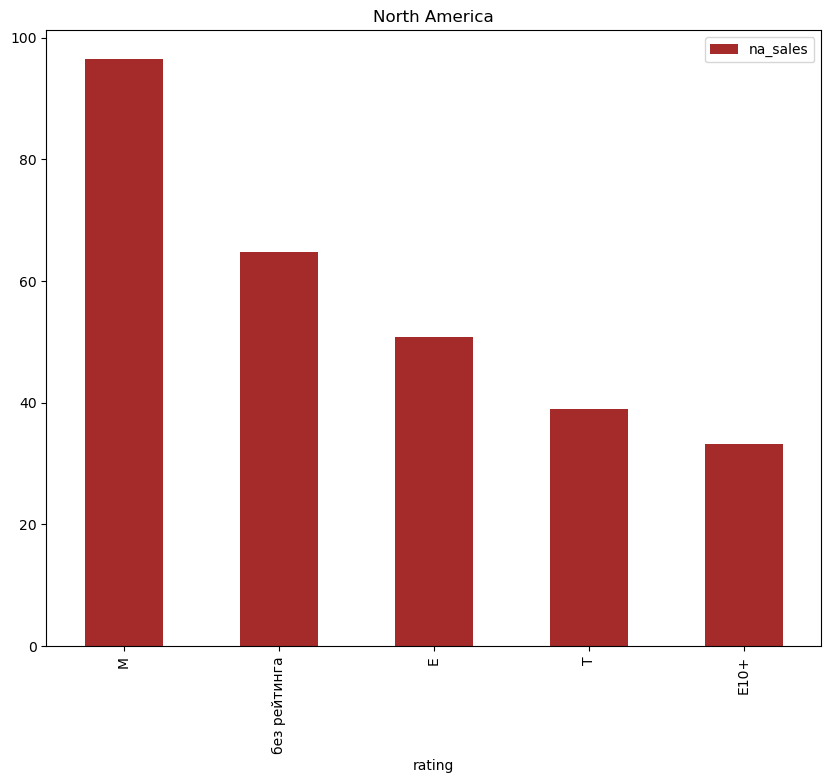

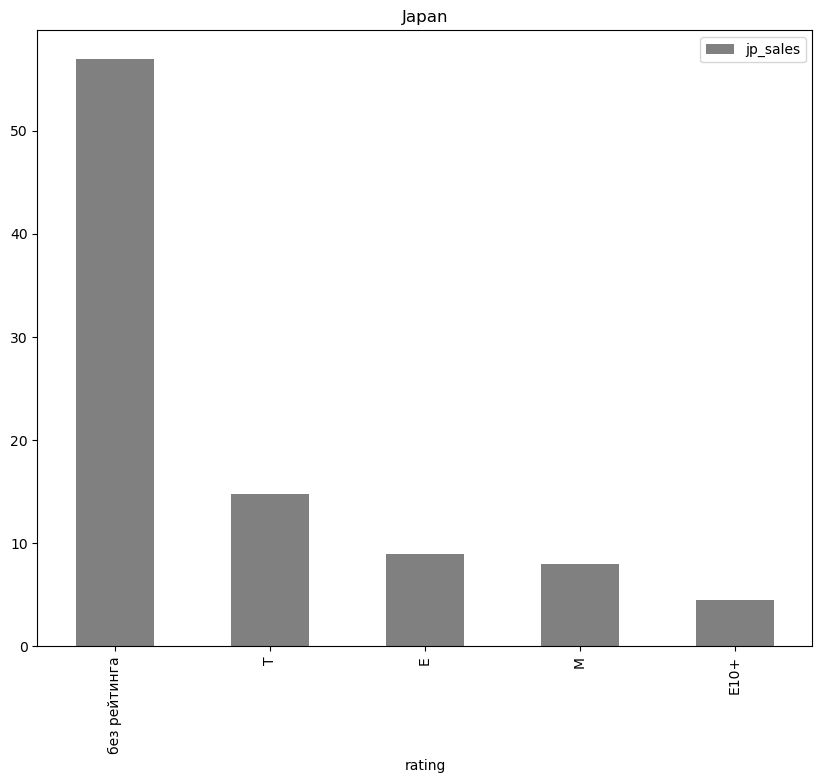

In [28]:
data_cut.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).plot(figsize=(10, 8), kind='bar', title='Europe')
data_cut.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='brown',  title='North America')
data_cut.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).plot(figsize=(10, 8), kind='bar', color='gray', title='Japan')

В Европпе и Северной Америке продажи по рейтингам схожи. В Японии нет кореляции продаж от рейтинга. 
Возможно это связанно с тем что в Японии нет акцента на рейтинговую систему, либо есть своя система классификации.

###### Вывод:
Рынки Европпы и Северной Америки очень схожи по показателям платформ, жанров и в общем по сумме продаж в регионах.
Японский рынок сильно отличается как по предпочтениям в жанрах так и п опредпочтениям в платформах при том что доля продаж 
игр в Японии достаточно велика.

### Проверка гипотез.

Гипотеза 1 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* H_0: Нулевая гипотеза - Рейтинги одинаковые.
* H_1: Альтернативная гипотеза - Рейтинги разные.


In [29]:
pc_rate = data_cut[(data_cut['platform'] == 'PC') & (data_cut['user_score'] > 0)]['user_score']
xbox_rate = data_cut[(data_cut['platform'] == 'XOne') & (data_cut['user_score'] > 0)]['user_score']

alpha = 0.05
results = st.ttest_ind(xbox_rate, pc_rate)
results

Ttest_indResult(statistic=1.6285882029651313, pvalue=0.10450507919348415)

In [30]:
if  results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Нет причиней отвергнуть гипотезу что рейтинги данных платформ сильно отличаются между собой. 

Гипотеза 2 : Средние пользовательские рейтинги жанров Action и Sports разные

* H_0: Нулевая гипотеза - Рейтинги одинаковые.
* H_1: Альтернативная гипотеза - Рейтинги разные.




In [31]:
action_rate = data_cut[(data_cut['genre'] == 'Action') & (data_cut['user_score'] > 0)]['user_score']
sport_rate = data_cut[(data_cut['genre'] == 'Sports') & (data_cut['user_score'] > 0)]['user_score']


alpha = 0.05

results = st.ttest_ind(action_rate, sport_rate)
results



Ttest_indResult(statistic=9.425173048948047, pvalue=2.8711147985105864e-19)

In [32]:
if  results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [33]:
action_rate.mean()
sport_rate.mean()

6.760606060606054

5.225196850393697

Можно отклонить гипотезу что рейтинги игр по жанрам Action И Sports одинаковые. 
Соответсвенно рейтинги данных жанров могут существенно отличаться.

В каждой гипотезе использовался t-критерий Стьюдента для независимых выборок т.к. платформы и жанры не связаны между собой.

### Вывод

В работе было проанализированны зависимости продаж от видов платформ жанров и оценки пользователей. На основе этих исследований были найдены следующие зависимости.

Жизненные циклы платформ со временем уменьшались что развите технологий(производительности платформ и качеству визуализации игр) ускоряется и производителям необходимо чаще обновлять свои платформы.

После анализа зависимости продаж от рейтингов можно предположить что продажи в большей степени зависят от рейтинга критиков нежели от рейтинга пользователей.

После проверки гипотез можно сделать предположение что пользовательские рейтинги можгут отличаться в от жанра к жанру.
Разница в рейтингах между платформами будет минимальна т.к. большинство современных игр выпускается на все виды консолей и 
пользовательский опыт на разных платформах будет схожим.

Опираясь на проведенный анализ можно утверждать что разработка игр для платформе PS4 жанра Shooter будет лучшем выбором для европейского и североамериканского рынка.


Японский рынок имеет большие отличия от глобальной картины, люди отдают предпочтения портативным платформам беззаговорочный лидером среди которых является 3DS от Nintendo. По жанрам лидируют RPG и Action. Хотя жанр Action немного уступает по популярности в Японии по моему мнению это подходящий жанр т.к. он пользуется высоким спросом во всем мире и можно делать продукт не опираясь только на локальный рынок.